# Simple Linear Regression 

In [2]:
# Import packages
import pandas as pd
import seaborn as sns

In [3]:
# Load dataset
penguins = sns.load_dataset("penguins")

# Examine first 5 rows of dataset
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## Data cleaning 

In [4]:
# Keep Adelie and Gentoo penguins, drop missing values
penguins_sub = penguins[penguins["species"] != "Chinstrap"]
penguins_final = penguins_sub.dropna()
penguins_final.reset_index(inplace=True, drop=True)

## Exploratory data analysis

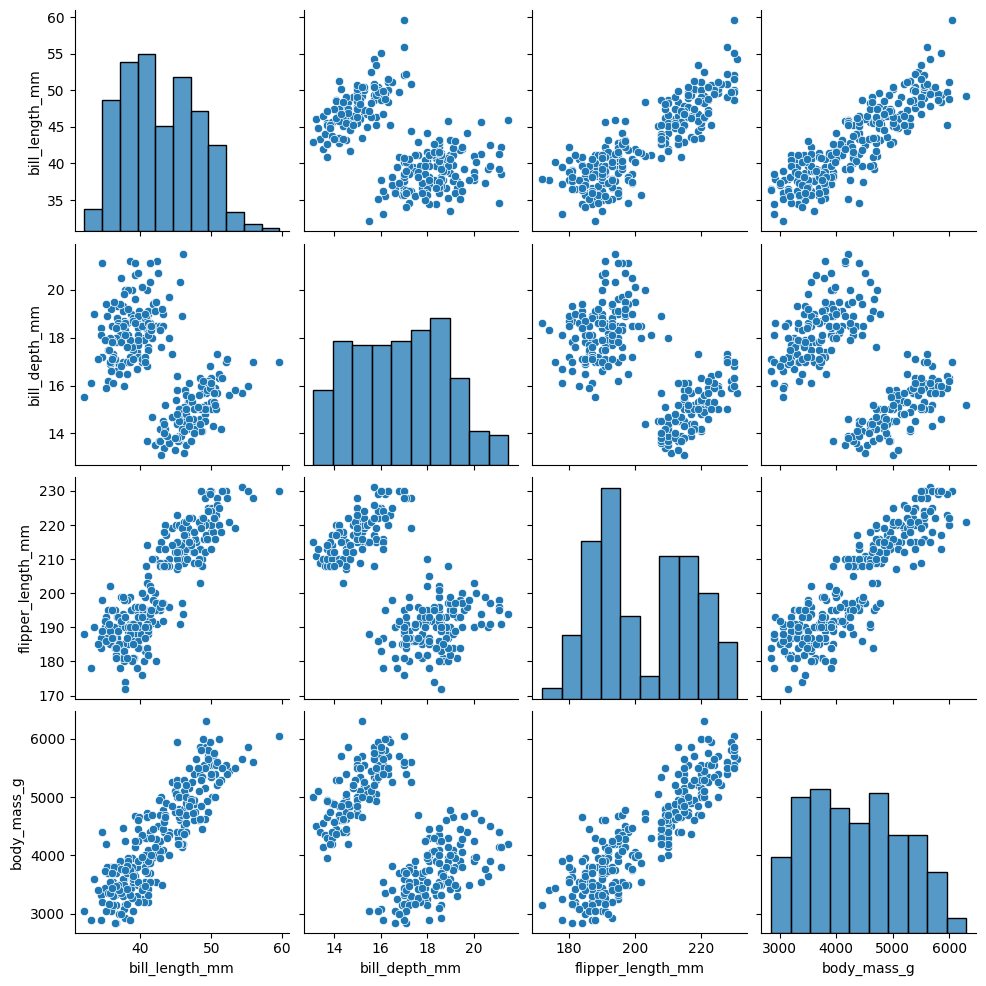

In [5]:
# Create pairwise scatterplots of data set
sns.pairplot(penguins_final)

From the scatterplot matrix, we can observe a few linear relationships:
* bill length (mm) and flipper length (mm)
* bill length (mm) and body mass (g)
* flipper length (mm) and body mass (g)

## Model construction



In [6]:
# Subset Data
ols_data = penguins_final[["bill_length_mm", "body_mass_g"]]

Next, we can construct the linear regression formula, and save it as a string. Remember that the y or dependent variable comes before the `~`, and the x or independent variables comes after the `~`.

**Note:** The names of the x and y variables have to exactly match the column names in the dataframe.

In [7]:
# Write out formula
ols_formula = "body_mass_g ~ bill_length_mm"

Lastly, we can build the simple linear regression model in `statsmodels` using the `ols()` function.

In [8]:
# Import ols function
from statsmodels.formula.api import ols

Then, we can plug in the `ols_formula` and `ols_data` as arguments in the `ols()` function. After we save the results as a variable, we can call on the `fit()` function to actually fit the model to the data.

In [9]:
# Build OLS, fit model to data
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()

Lastly, call the `summary()` function on the `model` object to get the coefficients and more statistics about the model. The output from `model.summary()` can be used to evaluate the model and interpret the results. 

In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     874.3
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           1.33e-85
Time:                        12:32:21   Log-Likelihood:                -1965.8
No. Observations:                 265   AIC:                             3936.
Df Residuals:                     263   BIC:                             3943.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1707.2919    205.640     -8.302      0.000   -2112.202   -1302.382
bill_length_mm   141.1904      4.775     29.569      0.000     131.788     150.592
==============================================================================
Omnibus:                        2.060   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.357   Jarque-Bera (JB):                2.103
Skew:                           0.210   Prob(JB):                        0.349
Kurtosis:                       2.882   Cond. No.                         357.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can use the `regplot()` function from `seaborn` to visualize the regression line.

<AxesSubplot: xlabel='bill_length_mm', ylabel='body_mass_g'>

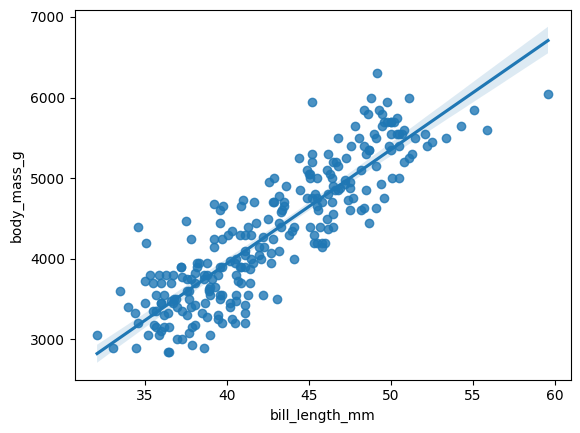

In [11]:
sns.regplot(x = "bill_length_mm", y = "body_mass_g", data = ols_data)

## Finish checking model assumptions

In [12]:
# Subset X variable
X = ols_data["bill_length_mm"]

# Get predictions from model
fitted_values = model.predict(X)

Then, we can save the model residuals as a variable by using the `model.resid` attribute.

In [13]:
# Calculate residuals
residuals = model.resid

### Check the normality assumption

To check the normality assumption, we can create a histogram of the residuals using the `histplot()` function from the `seaborn` package.

From the below histogram, we notice that the residuals are almost normally distributed. In this case, it is likely close enough that the assumption is met.

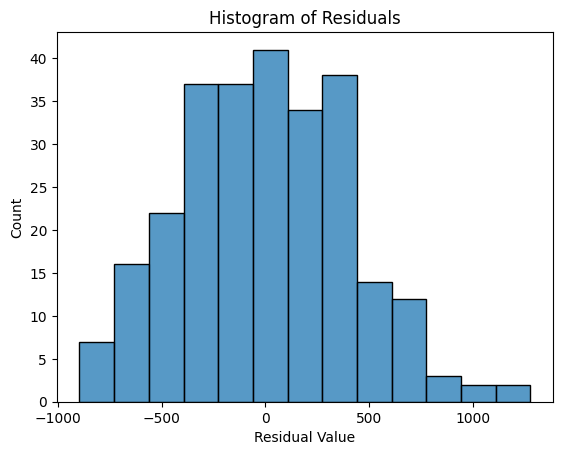

In [14]:
import matplotlib.pyplot as plt
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

Another way to check the normality function is to create a quantile-quantile or Q-Q plot.
The Q-Q plot shows a similar pattern to the histogram, where the residuals are mostly normally distributed, except at the ends of the distribution.

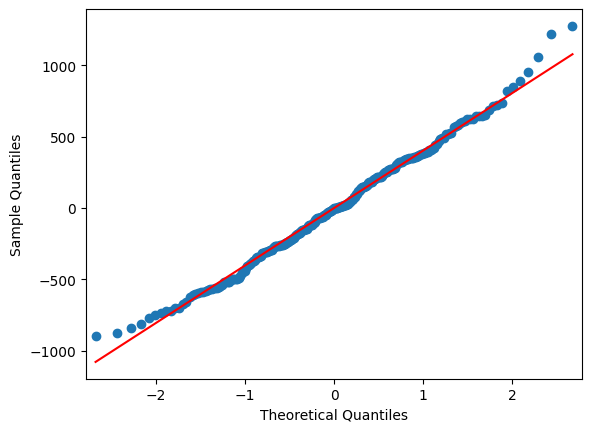

In [15]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
fig = sm.qqplot(model.resid, line = 's')
plt.show()

### Check the homoscedasticity assumption

Lastly, we have to check the homoscedasticity assumption. To check the homoscedasticity assumption, we can create a scatterplot of the fitted values and residuals. If the plot resembles a random cloud (i.e., the residuals are scattered randomly), then the assumption is likely met.

We can create one scatterplot by using the `scatterplot()` function from the `seaborn` package. The first argument is the variable that goes on the x-axis. The second argument is the variable that goes on the y-axis.

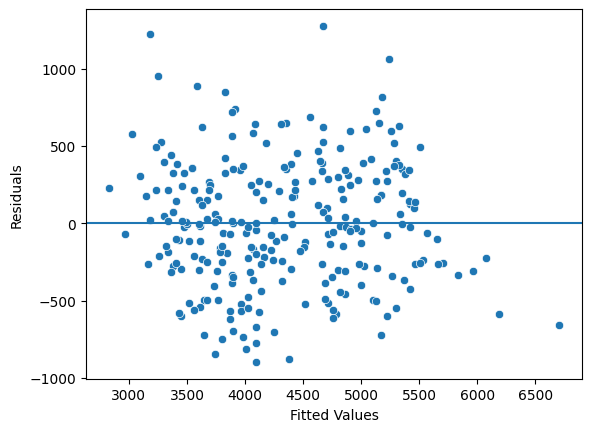

In [16]:
# Import matplotlib
import matplotlib.pyplot as plt
fig = sns.scatterplot(x=fitted_values, y=residuals)

# Add reference line at residuals = 0
fig.axhline(0)

# Set x-axis and y-axis labels
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")

# Show the plot
plt.show()